In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('C:/Users/aksha/Desktop/Data Science/car_purchasing.csv')
data.head()



,customer name,JobTitle,customer e-mail,country,gender,age,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,credit card debt,net worth,car purchase amount
0,Martina Avila,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,42,167411.18,0.00,400184.25,NaN,567595.43,567595.43,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,CAPTAIN III (POLICE DEPARTMENT),eu.dolor@diam.co.uk,Belize,0,41,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,CAPTAIN III (POLICE DEPARTMENT),vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,WIRE ROPE CABLE MAINTENANCE MECHANIC,malesuada@dignissim.com,Cook Islands,1,58,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,14426.164850,548599.0524,67422.36313
4,Cedric Leach,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57,134401.60,9737.00,182234.59,NaN,326373.19,326373.19,5358.712177,560304.0671,55915.46248


In [2]:
'''Here we have dataframe of car purchase. Our aim is to Find various relations between different parameter and find a logical
trend this data follows.'''


'Here we have dataframe of car purchase. Our aim is to Find various relations between different parameter and find a logical\ntrend this data follows.'

In [3]:
data.columns


Index(['customer name', 'JobTitle', 'customer e-mail', 'country', 'gender',
       'age', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay',
       'TotalPayBenefits', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [4]:
'''We have too many columns some of them are irrelevant to our Analysis. So we have to drop them.'''

data.drop(['JobTitle', 'customer e-mail', 'Benefits', 'TotalPayBenefits'], axis=1, inplace=True)

In [5]:
data.head()


,customer name,country,gender,age,BasePay,OvertimePay,OtherPay,TotalPay,credit card debt,net worth,car purchase amount
0,Martina Avila,Bulgaria,0,42,167411.18,0.00,400184.25,567595.43,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,Belize,0,41,155966.02,245131.88,137811.38,538909.28,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,Algeria,1,43,212739.13,106088.18,16452.60,335279.91,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,Cook Islands,1,58,77916.00,56120.71,198306.90,332343.61,14426.164850,548599.0524,67422.36313
4,Cedric Leach,Brazil,1,57,134401.60,9737.00,182234.59,326373.19,5358.712177,560304.0671,55915.46248


In [6]:
# Check for any Null Data.
data.isnull().values.any()

data.head()


,customer name,country,gender,age,BasePay,OvertimePay,OtherPay,TotalPay,credit card debt,net worth,car purchase amount
0,Martina Avila,Bulgaria,0,42,167411.18,0.00,400184.25,567595.43,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,Belize,0,41,155966.02,245131.88,137811.38,538909.28,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,Algeria,1,43,212739.13,106088.18,16452.60,335279.91,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,Cook Islands,1,58,77916.00,56120.71,198306.90,332343.61,14426.164850,548599.0524,67422.36313
4,Cedric Leach,Brazil,1,57,134401.60,9737.00,182234.59,326373.19,5358.712177,560304.0671,55915.46248


In [7]:
# O and 1 in gender column doesn't say much to us. lets replace them with generic term.
data['gender'].replace(0,'F',inplace=True)
data['gender'].replace(1,'M',inplace=True)

In [8]:
data.head()

,customer name,country,gender,age,BasePay,OvertimePay,OtherPay,TotalPay,credit card debt,net worth,car purchase amount
0,Martina Avila,Bulgaria,F,42,167411.18,0.00,400184.25,567595.43,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,Belize,F,41,155966.02,245131.88,137811.38,538909.28,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,Algeria,M,43,212739.13,106088.18,16452.60,335279.91,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,Cook Islands,M,58,77916.00,56120.71,198306.90,332343.61,14426.164850,548599.0524,67422.36313
4,Cedric Leach,Brazil,M,57,134401.60,9737.00,182234.59,326373.19,5358.712177,560304.0671,55915.46248


Text(0, 0.5, 'Car price')

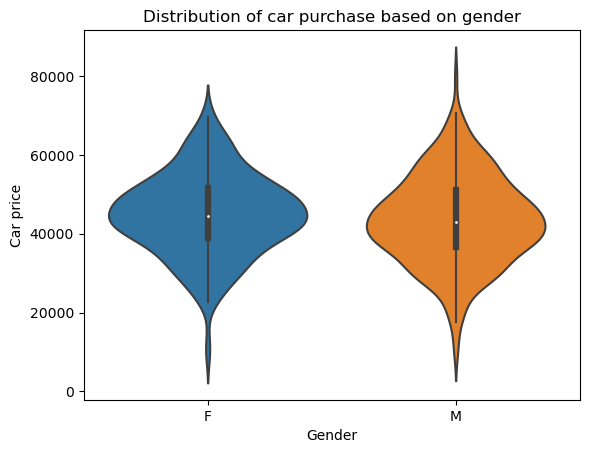

In [9]:
ax = sns.violinplot()
sns.violinplot(data = data, x = 'gender', y= 'car purchase amount')
ax.set_title('Distribution of car purchase based on gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Car price')

In [33]:
print(data['gender'].nunique())

2


In [11]:
avg_carprice = data[['car purchase amount']].apply(np.mean)

In [12]:
print(avg_carprice)

car purchase amount    44209.799218
dtype: float64


In [14]:
F_mean = data.groupby('gender')['car purchase amount'].mean()
#M_mean = data.groupby('country')['car_purchase_amount'].mean()
print

<function print>

In [15]:
print(F_mean)

gender
F    44933.131928
M    43503.620644
Name: car purchase amount, dtype: float64


In [ ]:
# As the violin plot shows there isn't much difference between the data distribution of both the groups
# Their IQR range is almost same and average too.

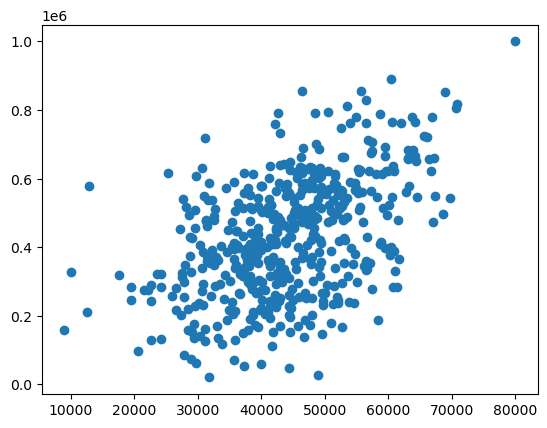

In [23]:
plt.scatter(data['car purchase amount'],data['net worth'] )

<AxesSubplot: xlabel='gender', ylabel='car purchase amount'>

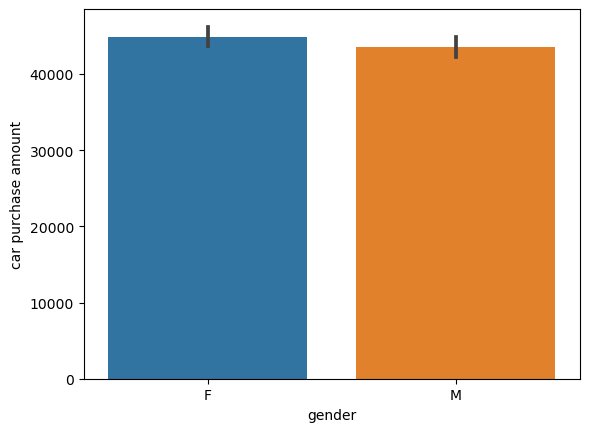

In [24]:
sns.barplot( x = 'gender', y = 'car purchase amount', data = data)

<AxesSubplot: xlabel='net worth', ylabel='car purchase amount'>

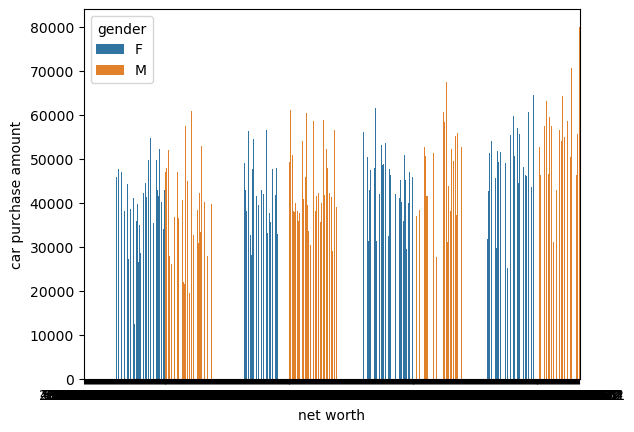

In [25]:
sns.barplot( x = 'net worth', y = 'car purchase amount', hue = 'gender', data = data)

<AxesSubplot: xlabel='gender', ylabel='car purchase amount'>

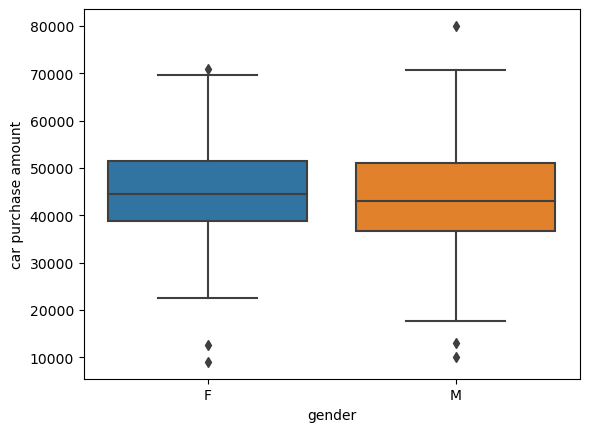

In [32]:
sns.boxplot( y =data["car purchase amount"], x = data['gender'] )

In [ ]:
# Above is the boxplot for car price with Gender.
# Our first analysis concludes that there isn't much difference between purchasing power.

In [ ]:
# Now we can go on with phase 2 which will mostly be based on countries.

In [34]:
print(data['country'].nunique())

211


In [5]:
import pandas as pd
cont = pd.read_csv('car_price_X_continent.csv')
cont.head()

,Unnamed: 0,country,car purchase amount,net worth,continent,sub_region
0,0,Afghanistan,56017.850725,342533.579375,Asia,Southern Asia
1,1,Algeria,47752.068330,539669.883120,Africa,Northern Africa
2,2,American Samoa,24221.999370,320834.010200,Oceania,Polynesia
3,3,Andorra,39239.699943,472957.648500,Europe,Southern Europe
4,4,Angola,44498.000075,454485.529200,Africa,Middle Africa


In [7]:
cont = cont.drop('Unnamed: 0', axis=1)

In [8]:
cont.head()

,country,car purchase amount,net worth,continent,sub_region
0,Afghanistan,56017.850725,342533.579375,Asia,Southern Asia
1,Algeria,47752.068330,539669.883120,Africa,Northern Africa
2,American Samoa,24221.999370,320834.010200,Oceania,Polynesia
3,Andorra,39239.699943,472957.648500,Europe,Southern Europe
4,Angola,44498.000075,454485.529200,Africa,Middle Africa
